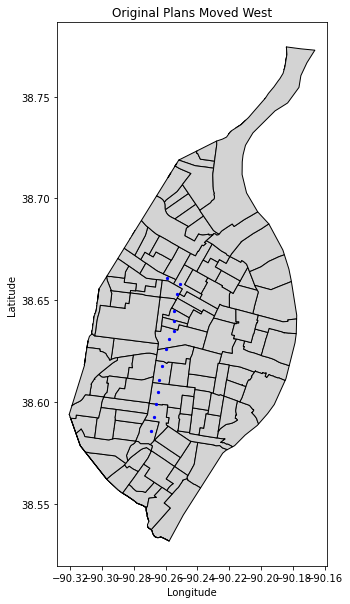

In [6]:
from shapely.geometry import Point
import geopandas as gpd
import matplotlib.pyplot as plt

orig = gpd.read_file(r"plans\OrigStops.shp")

# move a Point west by a given distance (in degrees)
def move_point_west(point, distance):
    lon, lat = point.xy
    new_lon = lon[0] - distance  # Subtract distance from longitude
    return Point(new_lon, lat[0])

#0.007 degrees is about half a mile
miles2Nudge = 3
nudge = 0.014*miles2Nudge

orig['geometry'] = orig['geometry'].apply(lambda geom: move_point_west(geom, nudge))


orig.to_file(r"plans\NudgedOrigStops.shp")

# Display the plot
plt.show()
modified_orig = gpd.read_file(r"plans\NudgedOrigStops.shp")
tracts = gpd.read_file(r"data\census tracts\CensusTractsStl.shp")

fig, ax = plt.subplots(figsize=(10, 10))
tracts.plot(ax=ax, color='lightgrey', edgecolor='black')
modified_orig.plot(ax=ax, color='blue', markersize=5)

# Set plot title and axis labels
ax.set_title('Original Plans Moved West')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Display the plot
plt.show()